In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./spam_dataset.csv")
print(data.head())

                                     message_content  is_spam
0  Hello Lonnie,\n\nJust wanted to touch base reg...        0
1  Congratulations, you've won a prize! Call us n...        1
2  You have been pre-approved for a credit card w...        1
3  Limited time offer, act now! Only a few spots ...        1
4  Your loan has been approved! Transfer funds to...        1


In [7]:
data.describe()

,is_spam
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [54]:
data.isna()

,message_content,is_spam,texto_limpio
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


/tmp/ipython-input-20-980015934.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='is_spam', palette='viridis')


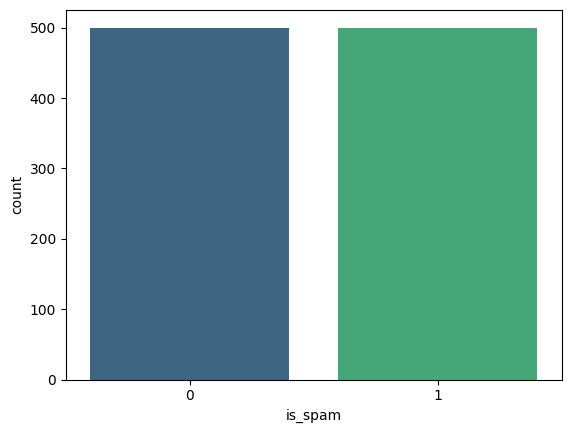

In [20]:
sns.countplot(data=data, x='is_spam', palette='viridis')
plt.show()

## Una vez que vemos que el dataset esta limpio, y que esta igualado podemos empezar a hacer el pipeline

In [28]:
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [29]:
def preprocesar_texto(text: str) -> str:
  text = text.lower()
  text = re.sub(r'\W', ' ', text)
  text = re.sub(r'\d+', '', text)
  text = ' '.join(word for word in text.split() if word not in stop_words)
  text = ' '.join(stemmer.stem(word) for word in text.split())

  return text

data['texto_limpio'] = data['message_content'].apply(preprocesar_texto)
data[['message_content', 'texto_limpio']].head()

,message_content,texto_limpio
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",hello lonni want touch base regard project nex...
1,"Congratulations, you've won a prize! Call us n...",congratul prize call us claim account select s...
2,You have been pre-approved for a credit card w...,pre approv credit card high limit special offe...
3,"Limited time offer, act now! Only a few spots ...",limit time offer act spot left immedi action r...
4,Your loan has been approved! Transfer funds to...,loan approv transfer fund today hurri lifetim ...


## Una vez tenemos ya el texto preprocesado vamos a entrenar el modelo

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['texto_limpio']).toarray()
y = data['is_spam'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        90

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



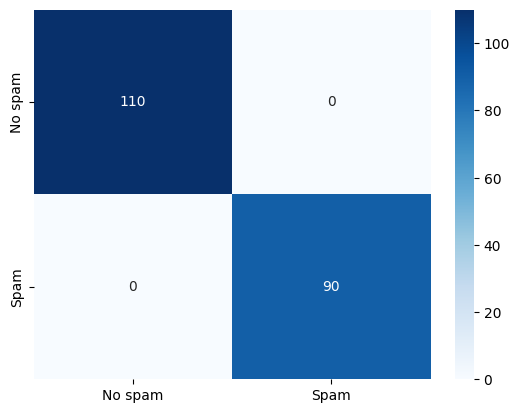

In [40]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No spam', 'Spam'], yticklabels=['No spam', 'Spam'])
plt.show()

## Las metricas son excelentes, pero vamos a hacer alguna comprobacion manual por si acaso

In [55]:
texto_prueba = "Hi, I came across your portfolio and I really liked your work. I'm currently looking for a developer for a project and wanted to know if you might be available to talk sometime this week. Let me know what works for you. Best regards!"

texto_prueba = preprocesar_texto(texto_prueba)
x_nuevo = vectorizer.transform([texto_prueba])

print(model.predict(x_nuevo))

[0]


In [53]:
texto_prueba = "Congratulations! Your number has been selected to receive a brand new iPhone 15 for free. You just need to log in to our exclusive portal within the next 2 hours to claim your prize: 🔗 www.premiosvip-now.com/login. If you don’t complete the process today, you will lose your chance. Don’t miss out!"

texto_prueba = preprocesar_texto(texto_prueba)
x_nuevo = vectorizer.transform([texto_prueba])

print(model.predict(x_nuevo))

[1]


## Comprobamos que funciona correctamente todo ;)